<a href="https://colab.research.google.com/github/arman258/CNG-562/blob/master/Negar_Arman_Shima_New_York_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# ***New York Stock Exchange***

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


# ***Downloading Dataset from Kaggle***

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

import Kaggle API

In [0]:
from google.colab import files
files.upload()

In [0]:
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
! kaggle datasets download dgawlik/nyse --unzip

 94% 31.0M/32.8M [00:00<00:00, 9.99MB/s]
100% 32.8M/32.8M [00:00<00:00, 39.7MB/s]


# ***Data prepration***

In [0]:
prices = pd.read_csv('prices.csv')
funda = pd.read_csv('fundamentals.csv')
sec = pd.read_csv('securities.csv')
price_split = pd.read_csv('prices-split-adjusted.csv')

In [0]:
price_split.head(10)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [0]:
price_split['symbol'].nunique()

501

In [0]:
funda.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322

In [0]:
sec.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [0]:
price_split = price_split[price_split.symbol == 'GOOG']
price_split.drop(['symbol'],1,inplace=True)


In [0]:
price_split = price_split.reset_index(drop=True)
price_split.head()

,date,open,close,low,high,volume
0,2010-01-04,312.304948,312.205308,310.955001,313.580158,3927000.0
1,2010-01-05,312.419511,310.830459,309.610028,312.748278,6031900.0
2,2010-01-06,311.761979,302.994813,302.048370,311.761979,7987100.0
3,2010-01-07,303.562685,295.941242,295.218951,303.861575,12876600.0
4,2010-01-08,294.895159,299.886470,293.455551,300.499172,9483900.0


In [0]:
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='arman258', api_key='kS7nwWGtDkVqZsx9kHkw')


In [0]:
dates = price_split["date"]
open_data = price_split["open"]
close_data = price_split["close"]
high_data = price_split["high"]
low_data = price_split["low"]

In [0]:
trace = go.Candlestick(x=dates,open=open_data,high=high_data,low=low_data,close=close_data)
layout = go.Layout(
    title='Google NYSE Closing Value',
        yaxis={"title": f'Stock Price (USD)'},
        xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)

data=[trace]

In [0]:
fig = go.Figure(data=data,layout=layout)
py.iplot(fig,filename='Google NYSE')

get technical indicators for Google NYSE

In [0]:
def trading_indicator(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['close'].rolling(window=21).mean()
    
    # Create Moving Average Convergence/Divergence
    dataset['26ema'] = dataset['close'].ewm(adjust=False,span=26).mean()
    dataset['12ema'] = dataset['close'].ewm(adjust=False,span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
#     dataset['20sd'] = pd.stats.moments.rolling_std(dataset['close'],20)
    dataset['20sd'] = dataset['close'].rolling(20).std()

    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = np.log(dataset['close']-1)
    
    return dataset

In [0]:
df_TI = trading_indicator(price_split)

In [0]:
df_TI.head(10)

,date,open,close,low,high,volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
0,2010-01-04,312.304948,312.205308,310.955001,313.580158,3927000.0,NaN,NaN,312.205308,312.205308,0.000000,NaN,NaN,NaN,312.205308,5.740453
1,2010-01-05,312.419511,310.830459,309.610028,312.748278,6031900.0,NaN,NaN,312.103468,311.993793,-0.109675,NaN,NaN,NaN,311.174171,5.736025
2,2010-01-06,311.761979,302.994813,302.048370,311.761979,7987100.0,NaN,NaN,311.428752,310.609334,-0.819418,NaN,NaN,NaN,305.511538,5.710410
3,2010-01-07,303.562685,295.941242,295.218951,303.861575,12876600.0,NaN,NaN,310.281529,308.352705,-1.928825,NaN,NaN,NaN,299.051588,5.686776
4,2010-01-08,294.895159,299.886470,293.455551,300.499172,9483900.0,NaN,NaN,309.511525,307.050207,-2.461318,NaN,NaN,NaN,299.610476,5.700064
5,2010-01-11,301.101926,299.433161,295.911366,301.101926,14479800.0,NaN,NaN,308.764980,305.878354,-2.886626,NaN,NaN,NaN,299.492104,5.698546
6,2010-01-12,297.709617,294.138017,292.902633,297.963676,9742900.0,302.204210,NaN,307.681501,304.072148,-3.609353,NaN,NaN,NaN,295.921079,5.680644
7,2010-01-13,287.169102,292.449324,285.878939,293.091933,13041800.0,299.381926,NaN,306.553191,302.284021,-4.269170,NaN,NaN,NaN,293.606223,5.674866
8,2010-01-14,290.860270,293.824173,290.317331,295.991047,8511900.0,296.952457,NaN,305.610301,300.982506,-4.627795,NaN,NaN,NaN,293.751531,5.679572
9,2010-01-15,295.562671,288.917549,287.941229,295.672260,10909600.0,294.941419,NaN,304.373801,299.126359,-5.247442,NaN,NaN,NaN,290.528821,5.662674


In [0]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Google - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.xlabel('Time [days]')

    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('Moving Average Convergence Divergence')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(30, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

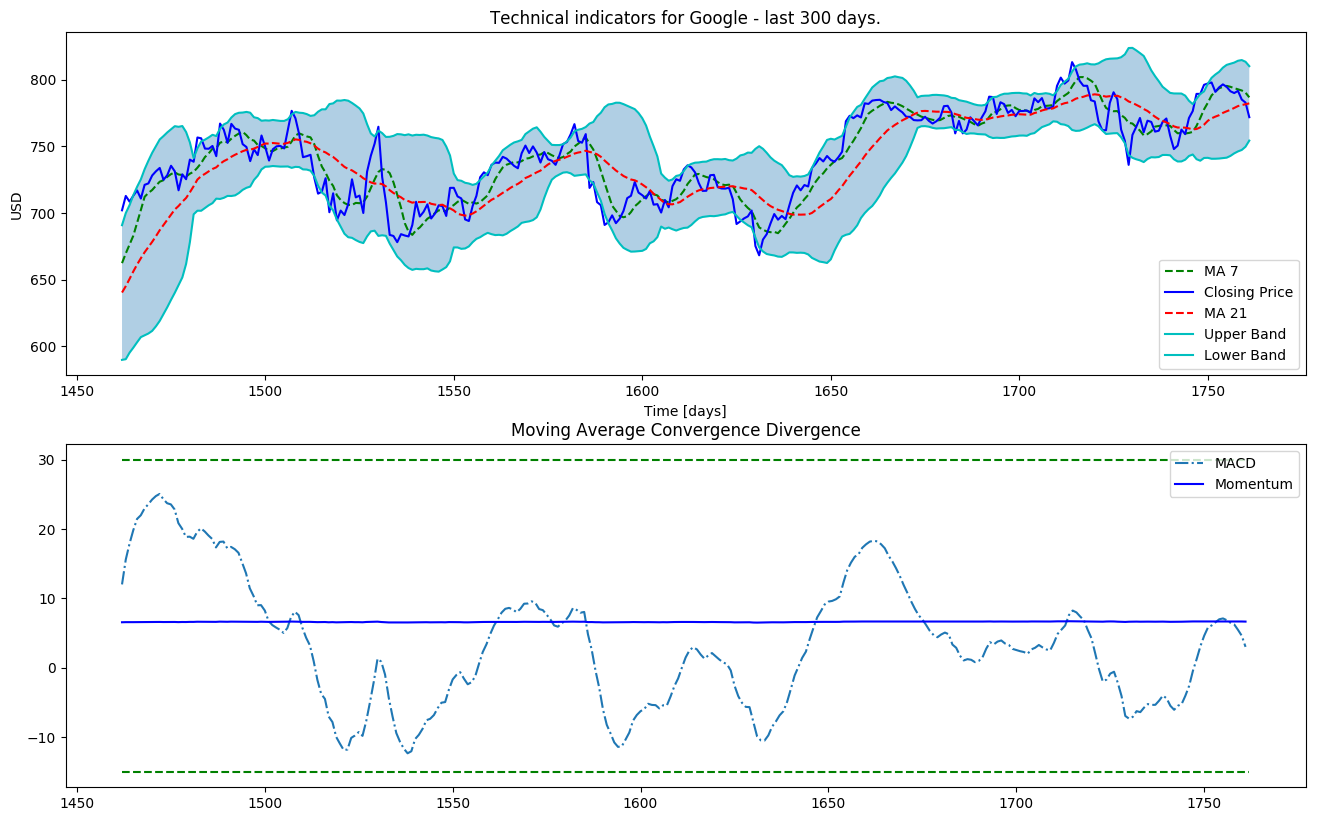

In [0]:
plot_technical_indicators(df_TI, 300)


*Fourier* transforms

In [0]:
df_FT = price_split[['date', 'close']]


In [0]:
close_fft = np.fft.fft(np.asarray(df_FT['close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



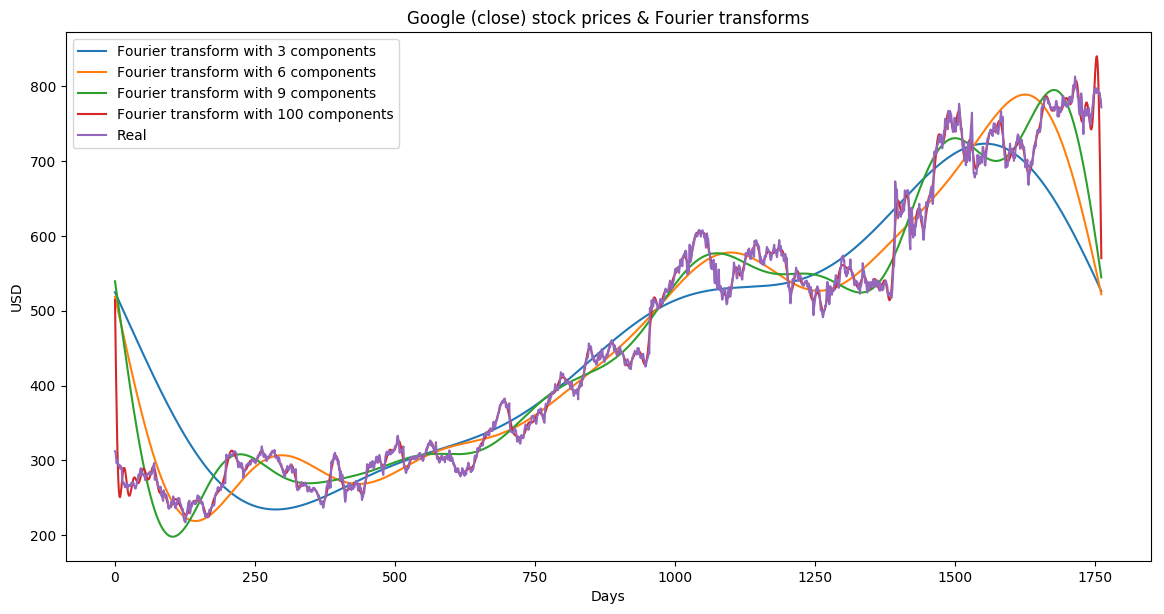

In [0]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(df_FT['close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Google (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [0]:
scaler = MinMaxScaler()

In [0]:
tr = scaler.fit_transform(df_TI.close.to_numpy().reshape(-1, 1))
ma7 = scaler.fit_transform(df_TI.ma7.to_numpy().reshape(-1, 1))

mse = mean_squared_error(tr[6:],ma7[6:])
rmse = np.sqrt(mse)

print('7-day moving average: %.5f MSE (%.2f RMSE)' % (mse, rmse))

7-day moving average: 0.00033 MSE (0.02 RMSE)


In [0]:
ma21 = scaler.fit_transform(df_TI.ma21.to_numpy().reshape(-1, 1))

mse = mean_squared_error(tr[20:],ma21[20:])
rmse = np.sqrt(mse)

print('20-day moving average: %.5f MSE (%.2f RMSE)' % (mse, rmse))

20-day moving average: 0.00120 MSE (0.03 RMSE)


In [0]:
ema = scaler.fit_transform(df_TI.ema.to_numpy().reshape(-1, 1))

mse = mean_squared_error(tr,ema)
rmse = np.sqrt(mse)
print('Exponential moving average: %.5f MSE (%.2f RMSE)' % (mse, rmse))

Exponential moving average: 0.00003 MSE (0.01 RMSE)


LSTM

In [0]:
df_price = pd.read_csv('prices-split-adjusted.csv',index_col=0)
df_price = df_price[df_price.symbol == 'GOOG']
df_price.drop(['symbol'],1,inplace=True)

In [0]:
def standard_scaler(X_train, X_test):
    train_samples, train_nx, train_ny = X_train.shape
    test_samples, test_nx, test_ny = X_test.shape
    
    X_train = X_train.reshape((train_samples, train_nx * train_ny))
    X_test = X_test.reshape((test_samples, test_nx * test_ny))
    
    preprocessor = scaler.fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    X_train = X_train.reshape((train_samples, train_nx, train_ny))
    X_test = X_test.reshape((test_samples, test_nx, test_ny))
    
    return X_train, X_test

In [0]:
def preprocess_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.values
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index : index + sequence_length])
        
    result = np.array(result)
    row = round(0.90 * result.shape[0])
    train = result[: int(row), :]
    
    train, result = standard_scaler(train, result)
    
    X_train = train[:, : -1]
    y_train = train[:, -1][: ,-1]
    X_test = result[int(row) :, : -1]
    y_test = result[int(row) :, -1][ : ,-1]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))  

    return [X_train, y_train, X_test, y_test]

prediction using last 20 day 

In [0]:
window = 20
X_train, y_train, X_test, y_test = preprocess_data(df_price, window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)


X_train (1567, 20, 5)
y_train (1567,)
X_test (174, 20, 5)
y_test (174,)


In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM, GRU

In [0]:
def build_model(layers):
    d = 0.3
    model = Sequential()
    
#     model.add(LSTM(512, input_shape=(layers[1], layers[0]), return_sequences=True))
#     model.add(Dropout(d))
    
#     model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=True))
#     model.add(Dropout(d))
        
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
#     model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1))
    
        
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    return model

In [0]:
model = build_model([X_train.shape[2], window,1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_47 (LSTM)               (None, 256)               268288    
_________________________________________________________________
dropout_47 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 257       
Total params: 268,545
Trainable params: 268,545
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history = model.fit(X_train,y_train,batch_size=256,epochs=90,validation_split=0.1,verbose=1)

Train on 1410 samples, validate on 157 samples
Epoch 1/90
1410/1410 [==============================] - 6s 4ms/step - loss: 0.0277 - acc: 7.0922e-04 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 2/90
1410/1410 [==============================] - 0s 142us/step - loss: 0.0115 - acc: 7.0922e-04 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 3/90
1410/1410 [==============================] - 0s 131us/step - loss: 0.0084 - acc: 7.0922e-04 - val_loss: 0.0064 - val_acc: 0.0000e+00
Epoch 4/90
1410/1410 [==============================] - 0s 131us/step - loss: 0.0077 - acc: 7.0922e-04 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 5/90
1410/1410 [==============================] - 0s 145us/step - loss: 0.0072 - acc: 7.0922e-04 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 6/90
1410/1410 [==============================] - 0s 130us/step - loss: 0.0071 - acc: 7.0922e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 7/90
1410/1410 [==============================] - 0s 131us/step - loss: 0.0069 - acc:

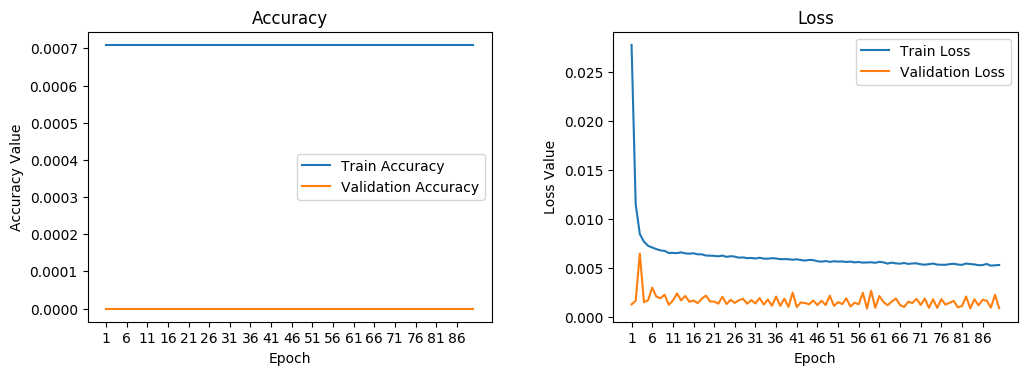

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=100)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['acc'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))


model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00477 MSE (0.07 RMSE)
Test Score: 0.00044 MSE (0.02 RMSE)


denormalize

In [0]:
diff = []
ratio = []
pred = model.predict(X_test)
print (pred.shape)

for u in range(len(y_test)):
    pr = pred[u][0]
    ratio.append((y_test[u] / pr) - 1)
    diff.append(abs(y_test[u] - pr))

(174, 1)


In [0]:
df = pd.read_csv('prices-split-adjusted.csv',index_col=0)
df = df[df.symbol == 'GOOG']
df.drop(['symbol'],1,inplace=True)


In [0]:
def denormalize(df, normalized_value): 
    df = df['close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    a = scaler.fit_transform(df)
    new = scaler.inverse_transform(normalized_value)
    return new

new_pred = denormalize(df_price, pred)
newy_test = denormalize(df_price, y_test)

In [0]:
def estimation_error(actual, prediction):
    return (actual - prediction)

error = estimation_error(newy_test, new_pred)


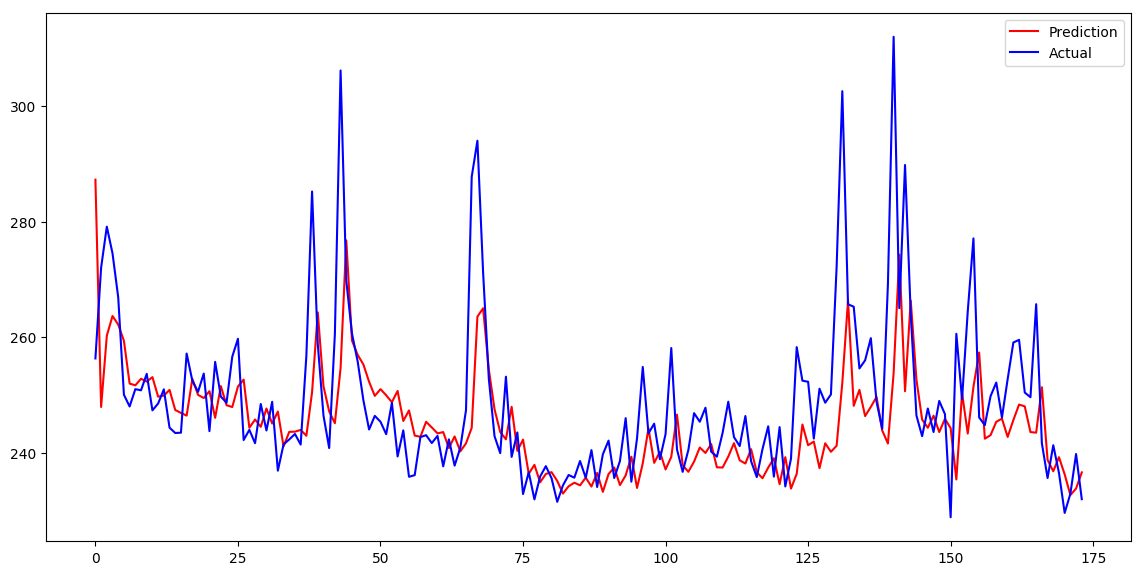

In [0]:
plt.figure(figsize=(14, 7), dpi=100)

plt.plot(new_pred,color='red', label='Prediction')
plt.plot(newy_test,color='blue', label='Actual')
# plt.plot(error,color='yellow', label='Error')

plt.legend(loc='best')
plt.show()

In [0]:
multi_predict_chart = go.Scatter(y=new_pred, name= 'Multi Predict Price')
actual_chart = go.Scatter(y=newy_test, name= 'Actual Price')
py.iplot([multi_predict_chart,actual_chart])
